📘 **Note Format Guide**

This format serves as a structured guide for organizing lecture content, personal interpretation, experiments, and study-related questions.

| Type | What It Means | When I Use It |
|------|----------------|----------------|
| 📝 Lecture | Original material from the professor’s notes | When I’m referencing core concepts or provided code |
| 🗣️ In-Class Note | Verbal explanations shared during the lecture | When I want to record something the professor said in class but didn’t include in the official notes |
| ✍️ My Note | My thoughts, interpretations, or additional explanations | When I reflect on or explain something in my own words |
| 🔬 Experiment | Code I tried out or changed to explore further | When I test variations or go beyond the original example |
| ❓ Question | Questions I had while studying | When I want to revisit or research something more deeply |

📝
🗣️
✍️
🔬
❓

# 1. 강의노트 원본 및 영상 링크

[https://guebin.github.io/DL2025/posts/05wk-1.html](https://guebin.github.io/DL2025/posts/05wk-1.html)

# 2. Imports 📝

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. 예측 📝

In [7]:
# (x,y)
# 언더라잉 <-- 우리의 진목표 X
# 예측 <-- 이게 진짜 우리의 목표 

🗣️ 그동안 언더라잉한 이유: 언더라잉만 잘 맞추면 예측도 잘 된다고 생각

## A. 데이터

In [3]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
y = x * 4 + 2.5 + eps
x,y = x.reshape(-1,1), y.reshape(-1,1)

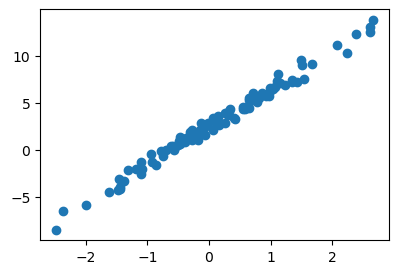

In [4]:
plt.plot(x,y,'o')

## B. 학습

- 🗣️ 현재 수준에서는 다음처럼 생각
    - y가 연속: MSELoss
    - y가 0 또는 1만: BCELoss

In [5]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
## 
for epoc in range(200):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

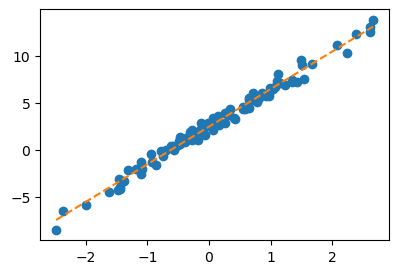

In [6]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

In [7]:
net[0].weight, net[0].bias

(Parameter containing:
 tensor([[4.0042]], requires_grad=True),
 Parameter containing:
 tensor([2.4459], requires_grad=True))

## C. 예측


온도가 0.1 도일때, 커피를 얼마나 팔까? 

In [8]:
0.1 * 4.0042 + 2.4459 

2.84632

In [9]:
xx = torch.tensor([[0.1]])
net(xx)

tensor([[2.8463]], grad_fn=<AddmmBackward0>)

온도가 0.2도일때 커피를 얼마나 팔까? 

In [10]:
0.2 * 4.0042 + 2.4459 

3.24674

In [11]:
xx = torch.tensor([[0.2]])
net(xx)

tensor([[3.2467]], grad_fn=<AddmmBackward0>)

온도가 [0.1, 0.2] 일때의 예측값을 한번에 보고 싶다면? 

In [12]:
xx = torch.tensor([[0.1],
                   [0.2]])
net(xx)

tensor([[2.8463],
        [3.2467]], grad_fn=<AddmmBackward0>)

:::{.callout-note}
이거 질문이 와서 좀 더 자세히 설명하겠습니다. (아직 `net(x)`의 계산 과정을 선형 변환 관점에서 수식으로 정리하는 데 익숙하지 않으셔서 그럴 수 있습니다. 이건 단순 산수라서 하나씩 차근차근 따라가다 보면 충분히 이해하실 수 있어요. 처음부터 바로 이해되지 않더라도 전혀 걱정하실 필요 없습니다.)

하나의 값 $x$에 대하여 $net(x)$는 아래를 의미하는 연산을 합니다. 

```Python
net(x) = 4.0042 * x + 2.4459  = net[0].weight * x + net[0].bias
```

사실 위의 과정을 수식으로 엄밀하게 쓰면 아래와 같습니다. 

$$net(\begin{bmatrix} x \end{bmatrix}) = 2.4459 + \begin{bmatrix} x \end{bmatrix} \begin{bmatrix} 4.0042 \end{bmatrix}$$

여기에서 $\begin{bmatrix} x \end{bmatrix}$ 와 $\begin{bmatrix} 4.0042  \end{bmatrix}$ 는 모두 $1\times 1$ matrix를 의미합니다. 만약에 $2 \times 1$ matrix ${\bf x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$를 네트워크의 입력으로 고려한다면 아래와 같이 됩니다. 

$$net({\bf x})=net\left(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}\right) = 2.4459 + \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \begin{bmatrix} 4.0042 \end{bmatrix} = \begin{bmatrix} 2.4459 + 4.0042 x_1 \\ 2.4459 + 4.0042 x_2\end{bmatrix} $$


따라서 ${\bf xx} = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix}$ 를 네트워크의 입력으로 넣으면 

$$net({\bf xx})= \begin{bmatrix} 2.4459 + 4.0042 \times 0.1 \\ 2.4459 + 4.0042 \times 0.2\end{bmatrix}= \begin{bmatrix} 2.8463 \\ 3.2467 \end{bmatrix}$$ 

와 같이 계산되겠죠.
:::

# 4. 오버피팅 (시벤코정리의 이면) 📝

🗣️ loss 측면에서 보면 오버피팅의 경우가 더 작음

## A. 오버피팅

`-` 오버피팅이란? 

- 위키: In mathematical modeling, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit to additional data or predict future observations reliably". (수학적 모델링에서 과적합이란 "어떤 모델이 주어진 데이터에 너무 꼭 맞춰져 있어서, 새로운 데이터나 미래의 결과를 잘 예측하지 못할 수 있는 상태"를 의미한다.)
- 제 개념: 데이터를 "데이터 = 언더라잉 + 오차"라고 생각할때 우리가 데이터로부터 적합할 것은 언더라잉인데 오차항을 적합하고 있는 현상. 

## B. 오버피팅 예시

🗣️ 네트워크의 표현력이 너무 좋을 때

`-` $m$이 매우 클때 아래의 네트워크 거의 무엇이든 맞출 수 있다고 보면 된다. 

- $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{h}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$ 
- $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{sig}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$
- $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{relu}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$

`-` 그런데 종종 맞추지 말아야 할 것들도 맞춘다. 

$$\text{model:} \quad y_i = (0\times x_i) + \epsilon_i,~~ \text{where}~ \epsilon_i \sim N(0,0.01^2)$$

🗣️ y는 x에 대한 식 X /  underlying = 0 / structure: 허구, 오차항이 만들어낸 우연

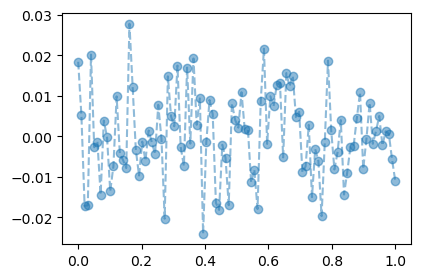

In [13]:
torch.manual_seed(5) 
x = torch.linspace(0,1,100).reshape(100,1)
y = torch.randn(100).reshape(100,1)*0.01
plt.plot(x,y,'--o',alpha=0.5)

In [14]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(1,512),
    torch.nn.ReLU(),
    torch.nn.Linear(512,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

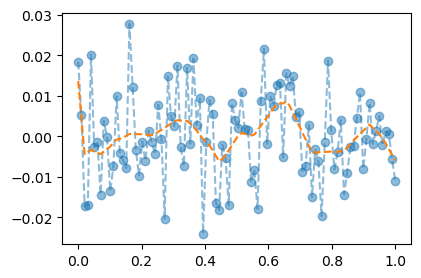

In [15]:
plt.plot(x,y,'--o',alpha=0.5)
plt.plot(x,net(x).data,'--')

🗣️ 0으로 적합하지 않은 것은 다 틀림

## C. 오버피팅이라는 뚜렷한 증거! (train / test)

🗣️ 0보다 주황색 선이 더 좋은 것 같다는 주장에 대한 반박 (예측)

`-` 데이터의 분리하여 보자. 

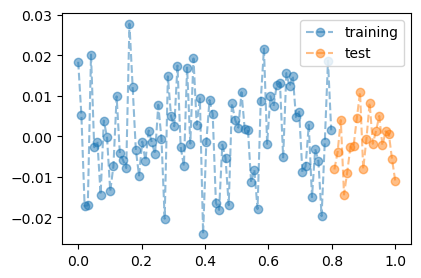

In [16]:
torch.manual_seed(5) 
x_all = torch.linspace(0,1,100).reshape(100,1)
y_all = torch.randn(100).reshape(100,1)*0.01
x,xx = x_all[:80], x_all[80:]
y,yy = y_all[:80], y_all[80:]
plt.plot(x,y,'--o',alpha=0.5,label="training")
plt.plot(xx,yy,'--o',alpha=0.5,label="test")
plt.legend()

`-` train만 학습

🗣️ B와 똑같은 조건

In [17]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(1,512),
    torch.nn.ReLU(),
    torch.nn.Linear(512,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

`-` training data로 학습한 net를 training data 에 적용 

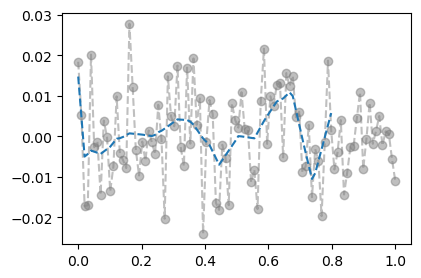

In [18]:
plt.plot(x_all,y_all,'--o',alpha=0.5,color="gray")
plt.plot(x,net(x).data,'--')

- training에서는 그럭저럭 잘 맞춤

`-` training data로 학습한 net를 test data 에 적용 

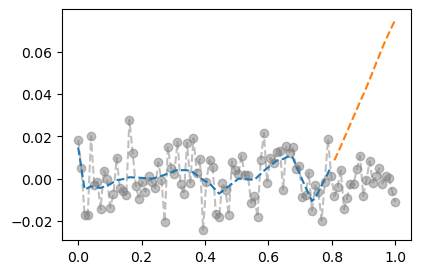

In [19]:
plt.plot(x_all,y_all,'--o',alpha=0.5,color="gray")
plt.plot(x,net(x).data,'--')
plt.plot(xx,net(xx).data,'--')

- train에서는 그럭저럭 잘 맞추는데 test에서는 엉망이다 = overfit 

🗣️ random이기 때문에 trend는 없음

## D. 시벤코정리의 올바른 이해

::: {.callout-note}

**시벤코의 항변(?)** [@cybenko1989approximation]

하나의 은닉층을 가지는 아래와 같은 꼴의 네트워크 $net: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$는

```Python
net = torch.nn.Sequential(
    torch.nn.Linear(p,???),
    torch.nn.Sigmoid(), ## <-- 여기에 렐루를 써도 된다. 
    torch.nn.Linear(???,q)
)
```

모든 보렐가측함수 

$$f: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$$ 

를 원하는 정확도로 "근사"시킬 수 있다. 쉽게 말하면 ${\bf X} \to {\bf y}$ 인 어떠한 복잡한 규칙라도 하나의 은닉층을 가진 신경망이 원하는 정확도로 근사시킨다는 의미이다. **그렇지만 이러한 규칙이 네크워크가 학습하지 못했던 자료 (처음 보는 자료, unseen data)** ${\bf XX}_{m \times p}$, ${\bf yy}_{m \times q}$ **에 대하여서도 올바르게 적용된다라는 보장은 없다**. 시벤코는 단지 `net`가 가지는 표현력의 한계를 수학적으로 밝혔을 뿐이다. 
:::



# 5. 드랍아웃 📝

## A. 오버피팅의 해결 

`-` 오버피팅의 해결책: 드랍아웃 

`-` 데이터

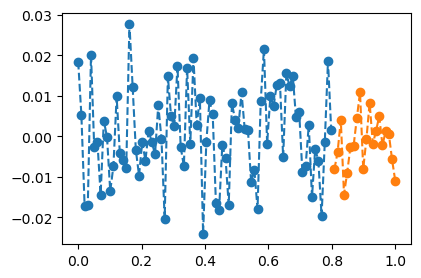

In [20]:
torch.manual_seed(5) 
x_all = torch.linspace(0,1,100).reshape(100,1)
y_all = torch.randn(100).reshape(100,1)*0.01
#plt.plot(x_all,y_all,'--o',alpha=0.5)
x,y = x_all[:80], y_all[:80]
xx,yy = x_all[80:], y_all[80:]
plt.plot(x,y,'--o',color="C0")
plt.plot(xx,yy,'--o',color="C1")

`-` 학습

🗣️ torch.nn.Dropout(0.8) 추가 (학습 시 일부만 사용)

In [21]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(1,512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(512,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화 (잘못된 사용)

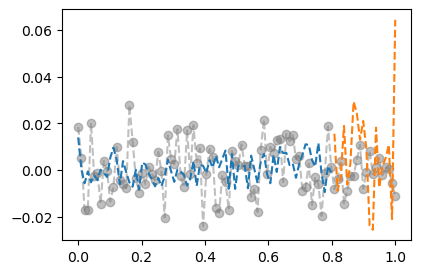

In [22]:
plt.plot(x_all,y_all,'--o',alpha=0.5,color="gray")
plt.plot(x,net(x).data,'--')
plt.plot(xx,net(xx).data,'--')

`-` 결과시각화 (올바른 사용)

In [23]:
net.training 

True

🗣️ 평가 모드로 바꾸기

In [24]:
net.eval()

Sequential(
  (0): Linear(in_features=1, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.8, inplace=False)
  (3): Linear(in_features=512, out_features=1, bias=True)
)

In [25]:
net.training

False

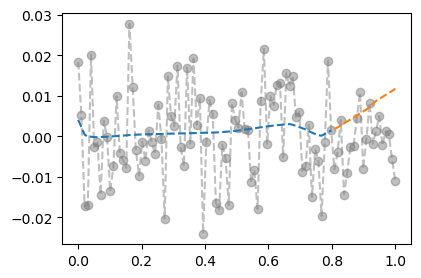

In [26]:
plt.plot(x_all,y_all,'--o',alpha=0.5,color="gray")
plt.plot(x,net(x).data,'--')
plt.plot(xx,net(xx).data,'--')

🗣️ 어느 정도 0으로 떨어짐, 오버피팅 문제가 완전히 해결되지는 않았지만 어느정도 완화 

## B. 드랍아웃 레이어 

`-` 드랍아웃의 성질1: 드랍아웃의 계산방식을 이해해보자. 

🗣️ default= 0.5

In [27]:
u = torch.randn(10,2)
d = torch.nn.Dropout(0.9)
u

tensor([[ 0.5951,  0.2245],
        [ 0.8238,  0.5230],
        [ 0.4772, -1.0465],
        [-0.6826,  0.4257],
        [ 0.5113,  0.4130],
        [-0.3946,  0.0827],
        [ 1.4149, -1.7569],
        [ 0.3142, -0.9964],
        [-0.4613,  0.3530],
        [-0.2743, -0.5558]])

In [28]:
d(u)

tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, -0.0000],
        [-0.0000, 0.0000],
        [5.1128, 4.1303],
        [-0.0000, 0.0000],
        [0.0000, -0.0000],
        [0.0000, -0.0000],
        [-0.0000, 3.5305],
        [-0.0000, -0.0000]])

- 90\%의 드랍아웃: 드랍아웃층의 입력 중 임의로 90\%를 골라서 결과를 0으로 만든다. + 그리고 0이 되지않고 살아남은 값들은 10배 만큼 값이 커진다.
- 남은값을 10배 키우는 이유? 출력의 평균값을 보정하기 위해서

`-` 드랍아웃의 성질2: 드랍아웃을 on/off 하는 방법을 이해해보자. 

In [29]:
u = torch.randn(10,2)
u

tensor([[ 0.8395,  1.8825],
        [-0.0415, -2.3987],
        [-0.3658, -1.3403],
        [-1.4066,  0.7178],
        [-1.0465,  0.9663],
        [-1.2350,  1.3424],
        [-1.1903,  0.3955],
        [ 0.4236, -0.7882],
        [-0.4348,  0.2669],
        [-0.9102, -0.3219]])

In [30]:
net = torch.nn.Sequential(
    torch.nn.Dropout(0.9)
)
net

Sequential(
  (0): Dropout(p=0.9, inplace=False)
)

In [31]:
u,net(u)

(tensor([[ 0.8395,  1.8825],
         [-0.0415, -2.3987],
         [-0.3658, -1.3403],
         [-1.4066,  0.7178],
         [-1.0465,  0.9663],
         [-1.2350,  1.3424],
         [-1.1903,  0.3955],
         [ 0.4236, -0.7882],
         [-0.4348,  0.2669],
         [-0.9102, -0.3219]]),
 tensor([[  0.0000,   0.0000],
         [ -0.0000,  -0.0000],
         [ -0.0000,  -0.0000],
         [-14.0662,   0.0000],
         [ -0.0000,   0.0000],
         [-12.3497,   0.0000],
         [ -0.0000,   0.0000],
         [  4.2361,  -0.0000],
         [ -0.0000,   0.0000],
         [ -0.0000,  -3.2190]]))

🗣️ 매번 어떤 노드가 죽을지 모름 (다 0이 되기도 함)

❓ 비율? 확률?

In [32]:
net.training

True

In [33]:
net.eval() # 드랍아웃이 무력화

Sequential(
  (0): Dropout(p=0.9, inplace=False)
)

In [34]:
u,net(u)

(tensor([[ 0.8395,  1.8825],
         [-0.0415, -2.3987],
         [-0.3658, -1.3403],
         [-1.4066,  0.7178],
         [-1.0465,  0.9663],
         [-1.2350,  1.3424],
         [-1.1903,  0.3955],
         [ 0.4236, -0.7882],
         [-0.4348,  0.2669],
         [-0.9102, -0.3219]]),
 tensor([[ 0.8395,  1.8825],
         [-0.0415, -2.3987],
         [-0.3658, -1.3403],
         [-1.4066,  0.7178],
         [-1.0465,  0.9663],
         [-1.2350,  1.3424],
         [-1.1903,  0.3955],
         [ 0.4236, -0.7882],
         [-0.4348,  0.2669],
         [-0.9102, -0.3219]]))

`-` 드랍아웃레이어 정리 

- 계산: (1) 입력의 일부를 임의로 0으로 만드는 역할 (2) 0이 안된것들은 스칼라배하여 드랍아웃을 통과한 모든 숫자들의 총합이 대체로 일정하게 되도록 조정
- on/off: 학습시에는 dropout on / 학습을 하지 않을 경우는 dropout off
- 느낌: 일부러 패널티를 안고 학습하는 느낌.. 
- 효과: 오버피팅을 억제하는 효과가 있음

🗣️ 랜덤 포레스트와 동일

> 참고: 오버피팅을 잡는 방법은 드랍아웃만 있는게 아니다.. 

🗣️ 근본: 시각화 후 데이터에 맞춘 모델을 찾음 (어려움) / 실제: 시벤코 정리로 적합을 한 후 드랍아웃을 걸어 오버피팅 방지

## C. 드랍아웃 레이어의 위치 

`-` ReLU,dropout의 특이한 성질: $\text{dropout}(\text{relu}({\bf x}))=\text{relu}(\text{dropout}({\bf x}))$  

🗣️ 둘 다 x를 그대로 내보내거나 0으로 만듦 (순서 상관 없이 결과 동일)

In [36]:
u = torch.randn(10,2)
r = torch.nn.ReLU()
d = torch.nn.Dropout()

In [37]:
torch.manual_seed(0)
d(r(u))

tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.5372],
        [2.6658, 2.1870],
        [0.3798, 0.0000],
        [0.0000, 1.6593],
        [0.9300, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000]])

In [38]:
torch.manual_seed(0)
r(d(u))

tensor([[0.0000, 0.0000],
        [-0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.5372],
        [2.6658, 2.1870],
        [0.3798, -0.0000],
        [0.0000, 1.6593],
        [0.9300, 0.0000],
        [0.0000, 0.0000],
        [-0.0000, 0.0000]])

`-` 다른 활성화함수는 성립안함 

🗣️ 활성화 함수: 비선형 함수, activation 함수

In [39]:
u = torch.randn(10,2)
s = torch.nn.Sigmoid()
d = torch.nn.Dropout()

In [40]:
torch.manual_seed(0)
d(s(u))

tensor([[0.4801, 0.0000],
        [0.0000, 1.4006],
        [0.3487, 0.0000],
        [0.0000, 1.2299],
        [0.9213, 1.6180],
        [1.1322, 0.0000],
        [0.0000, 1.4407],
        [0.6015, 1.4349],
        [0.0000, 1.7626],
        [0.0000, 0.0000]])

In [41]:
torch.manual_seed(0)
s(d(u))

tensor([[0.0907, 0.5000],
        [0.5000, 0.8452],
        [0.0427, 0.5000],
        [0.5000, 0.7183],
        [0.4218, 0.9472],
        [0.6300, 0.5000],
        [0.5000, 0.8691],
        [0.1561, 0.8657],
        [0.5000, 0.9822],
        [0.5000, 0.5000]])

`-` 결론: 드랍아웃은 활성화 함수 바로 뒤에 오는게 맞음. (그렇지 않다면 0을 만들 수 없는걸?) 그렇지만 ReLU의 경우 활성화 함수 직전에 취하기도 함. 

🗣️ ReLU는 순서를 바꾸는 것이 계산 상에 효율이 있다고 함

## D. 평균보정의 필요성 (선택학습)

:::{.callout-note}
90%의 드랍아웃에서 출력결과에 왜 x10하는지 좀 더 자세히 설명한 챕터입니다. 궁금하시다면 읽어보시고 아니라면 넘어가셔도 무방합니다. 
:::

`-` 아래의 데이터를 관찰하자. 

In [803]:
x,_ = torch.randn(300).sort()
y = relu(20*x) + torch.randn(300)
x,y = x.reshape(-1,1), y.reshape(-1,1)

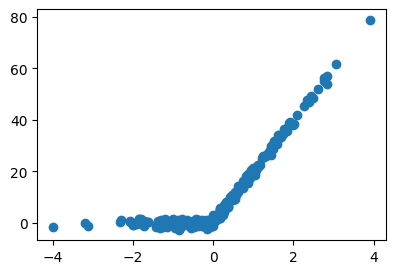

In [804]:
plt.plot(x,y,'o')

`-` 적합해보자.

In [805]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(1,1000),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.1),
    torch.nn.Linear(1000,1,bias=False),
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(5000):
    ## 1 
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [806]:
net.eval()

Sequential(
  (0): Linear(in_features=1, out_features=1000, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=1000, out_features=1, bias=False)
)

In [807]:
net.training

False

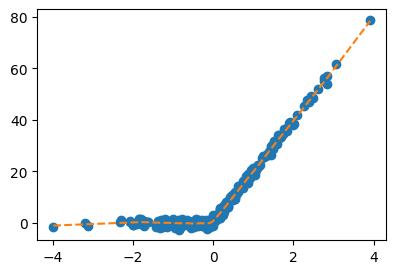

In [808]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

`-` 주황색선이나오는 이유 설명해보자. 

In [815]:
U = net[:-1](x).data 
W = net[-1].weight.T 

*아래3개는 동일한코드임*

In [819]:
net(x).reshape(-1)[:10] # 코드1

tensor([-0.9858, -0.5127, -0.4687,  0.0514,  0.0558,  0.2089,  0.2213,  0.2619,
         0.2691,  0.2823], grad_fn=<SliceBackward0>)

In [820]:
(U@W).reshape(-1)[:10] # 코드2

tensor([-0.9858, -0.5127, -0.4687,  0.0514,  0.0558,  0.2089,  0.2213,  0.2619,
         0.2691,  0.2823], grad_fn=<SliceBackward0>)

In [822]:
((U*W.reshape(-1)).sum(axis=1))[:10] # 코드3

tensor([-0.9858, -0.5127, -0.4687,  0.0514,  0.0558,  0.2089,  0.2213,  0.2619,
         0.2691,  0.2823], grad_fn=<SliceBackward0>)

*따라서 아래의 주황색선들의 `.sum(axis=1)` 하기만 하면 `net(x)`의 결과가 된다.*

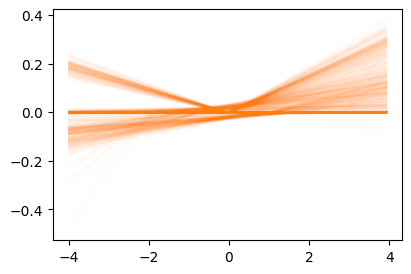

In [823]:
plt.plot(x,U*W.reshape(-1).data,color="C1",alpha=0.02);

`-` 즉 왼쪽의 주황색선^[1000개가 있음]이 모두 합쳐져서 오른쪽의 점선이된다. 

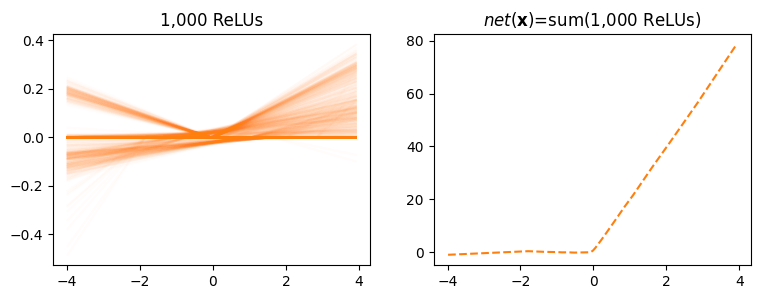

In [834]:
fig,ax = plt.subplots(1,2,figsize=(9,3))
ax[0].plot(x,U*W.reshape(-1).data,color="C1",alpha=0.02);
ax[0].set_title("1,000 ReLUs")
ax[1].plot(x,net(x).data,'--',color="C1")
ax[1].set_title(r"$net({\bf x})$=sum(1,000 ReLUs)");

- 만약에 왼쪽의 주황색선이 10%만 사용되어서 100개의 렐루만 사용되었다면? 대충 x10을 해줘야 `net(x)` 가 나오지 않겠어요? 